In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv('Cleaned_spotify_data2')

In [4]:
df.head()

,acousticness,danceability,duration_ms,energy,explicit,Song ID,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,Number of days on charts,Charted,Main_artist,Featured_artist
0,0.887,0.319,187333,0.201,0,1hx7X9cMXHWJjknb9O6Ava,0.000000,7,0.9040,-17.796,1,The September Of My Years - Live At The Sands ...,27,0.0623,117.153,0.239,2018,0.0,0.0,Other,No features
1,0.938,0.269,236800,0.129,0,19oquvXf3bc65GSqtPYA5S,0.000005,7,0.6830,-18.168,0,It Was A Very Good Year - Live At The Sands Ho...,26,0.0576,82.332,0.160,2018,0.0,0.0,Other,No features
2,0.881,0.644,313093,0.212,0,55qyghODi24yaDgKBI6lx0,0.000022,11,0.7980,-14.118,1,"The Circle Game - Live at The 2nd Fret, Philad...",19,0.0347,117.072,0.441,2020,0.0,0.0,Other,No features
3,0.955,0.627,295093,0.184,0,00xemFYjQNRpOlPhVaLAHa,0.000162,1,0.0986,-15.533,1,"Urge For Going - Live at The 2nd Fret, Philade...",19,0.0450,115.864,0.299,2020,0.0,0.0,Other,No features
4,0.888,0.581,183440,0.331,0,2lm5FQJRHvc3rUN5YHpEWj,0.000015,6,0.1470,-14.087,1,What's The Story Mr. Blue - Live at The 2nd Fr...,19,0.2430,88.303,0.642,2020,0.0,0.0,Other,No features


In [5]:
df.drop('Song ID', axis=1, inplace =True )

# EDA on non dummy variables 

In [6]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name',
       'popularity', 'speechiness', 'tempo', 'valence', 'year',
       'Number of days on charts', 'Charted', 'Main_artist',
       'Featured_artist'],
      dtype='object')

In [7]:
df_non_dummy = df.copy()

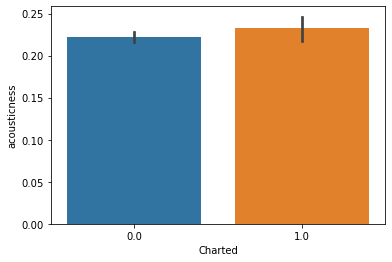

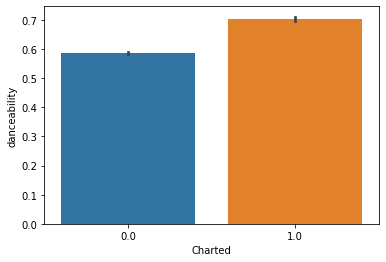

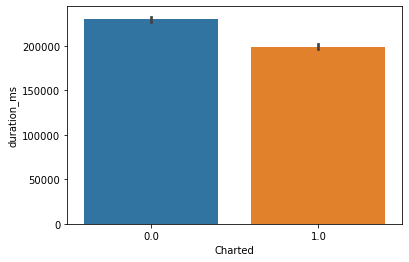

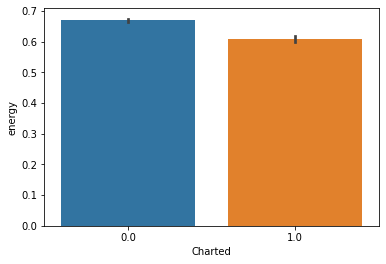

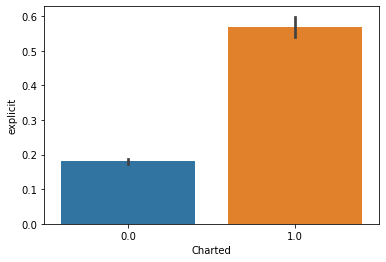

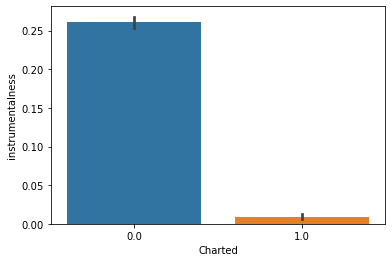

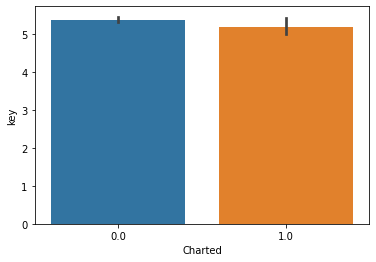

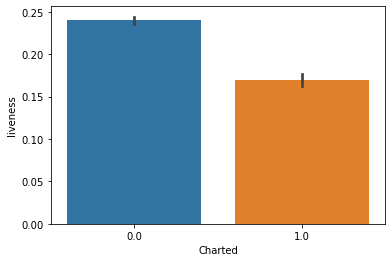

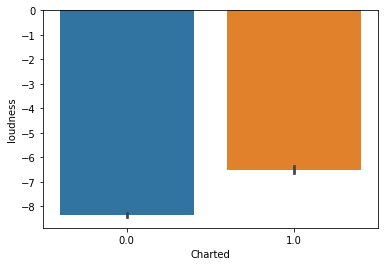

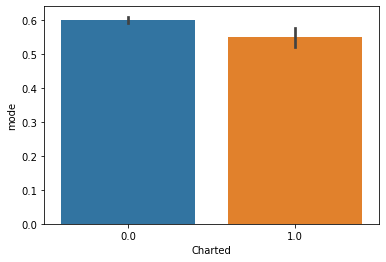

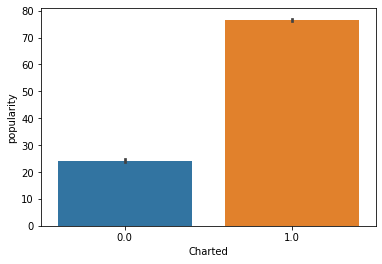

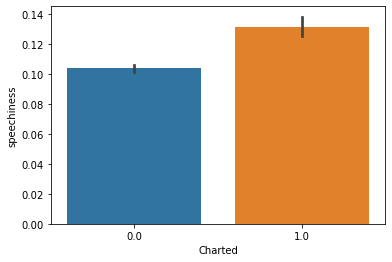

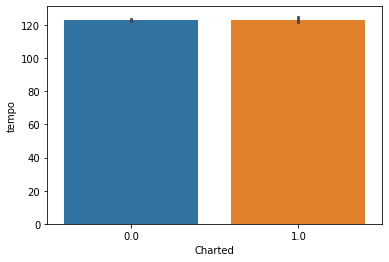

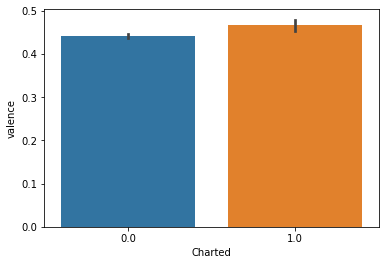

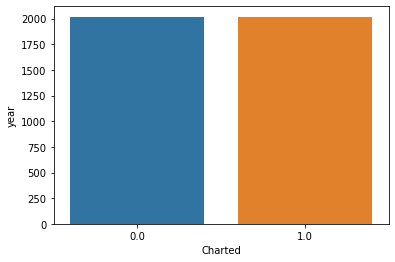

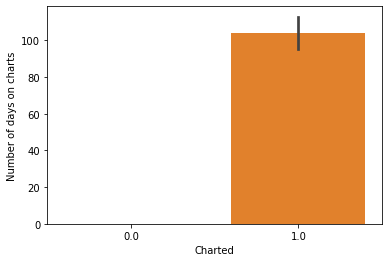

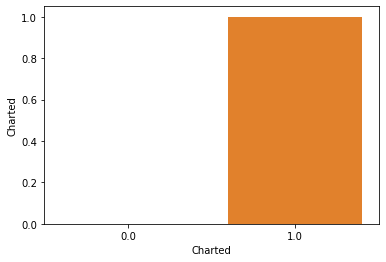

In [9]:
for col in df_non_dummy:
    if df_non_dummy[col].dtype != 'object':
        sns.barplot(data=df_non_dummy, y=col, x='Charted')
        plt.show()

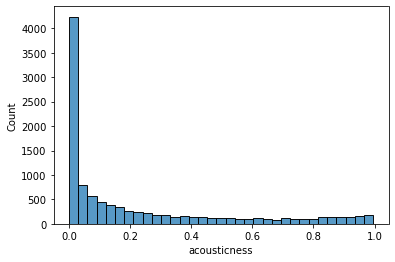

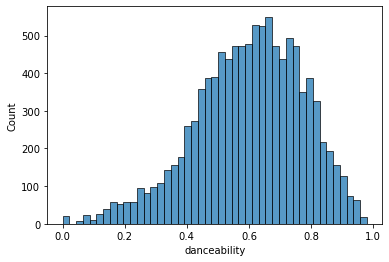

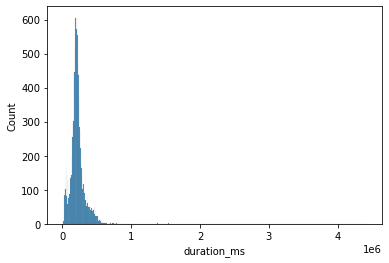

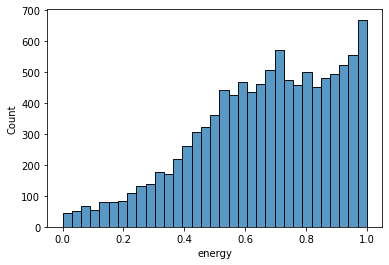

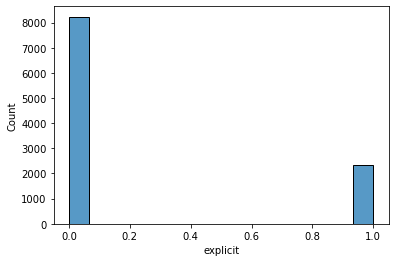

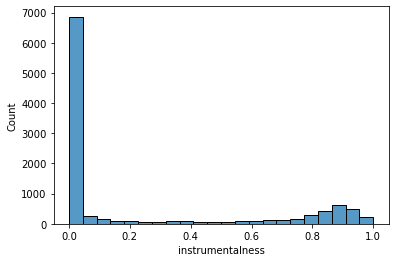

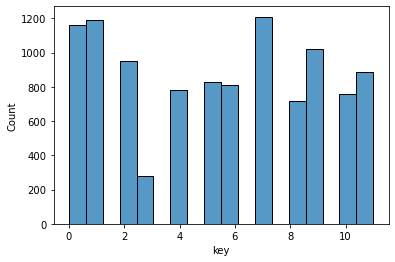

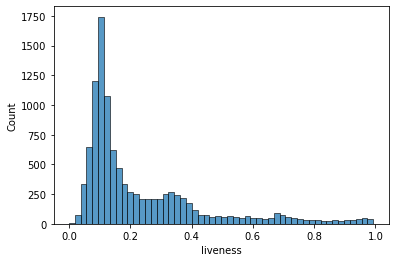

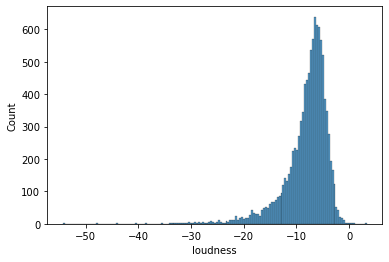

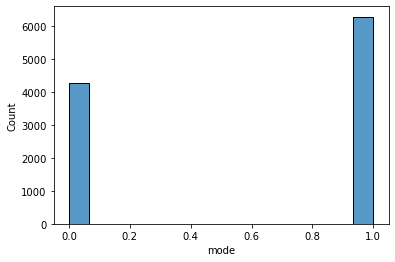

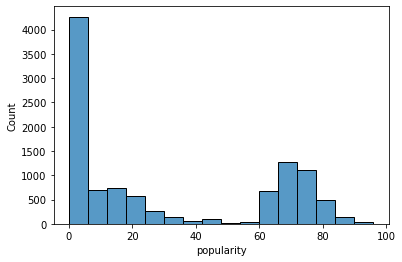

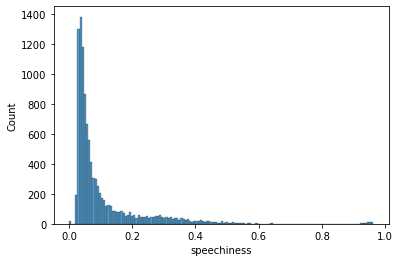

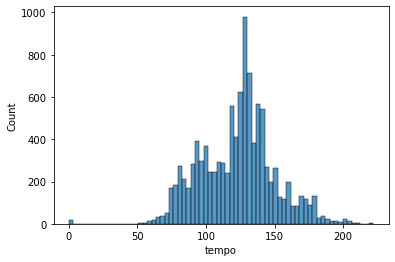

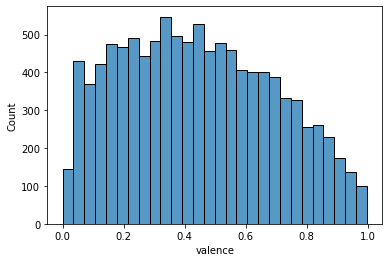

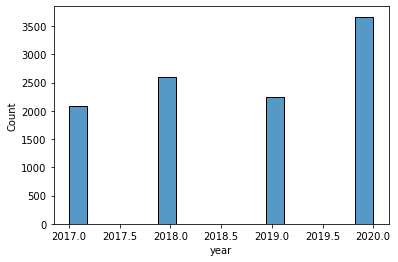

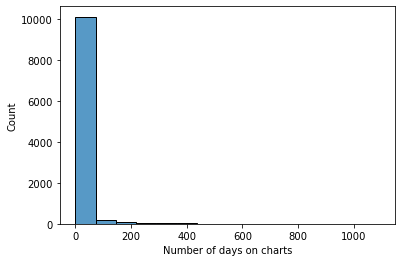

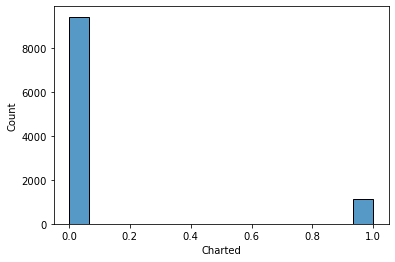

In [10]:
for col in df_non_dummy:
    if df_non_dummy[col].dtype != 'object':
        sns.histplot(data=df_non_dummy, x=col)
        plt.show()

In [11]:
corr = df_non_dummy.corr()

<AxesSubplot:>

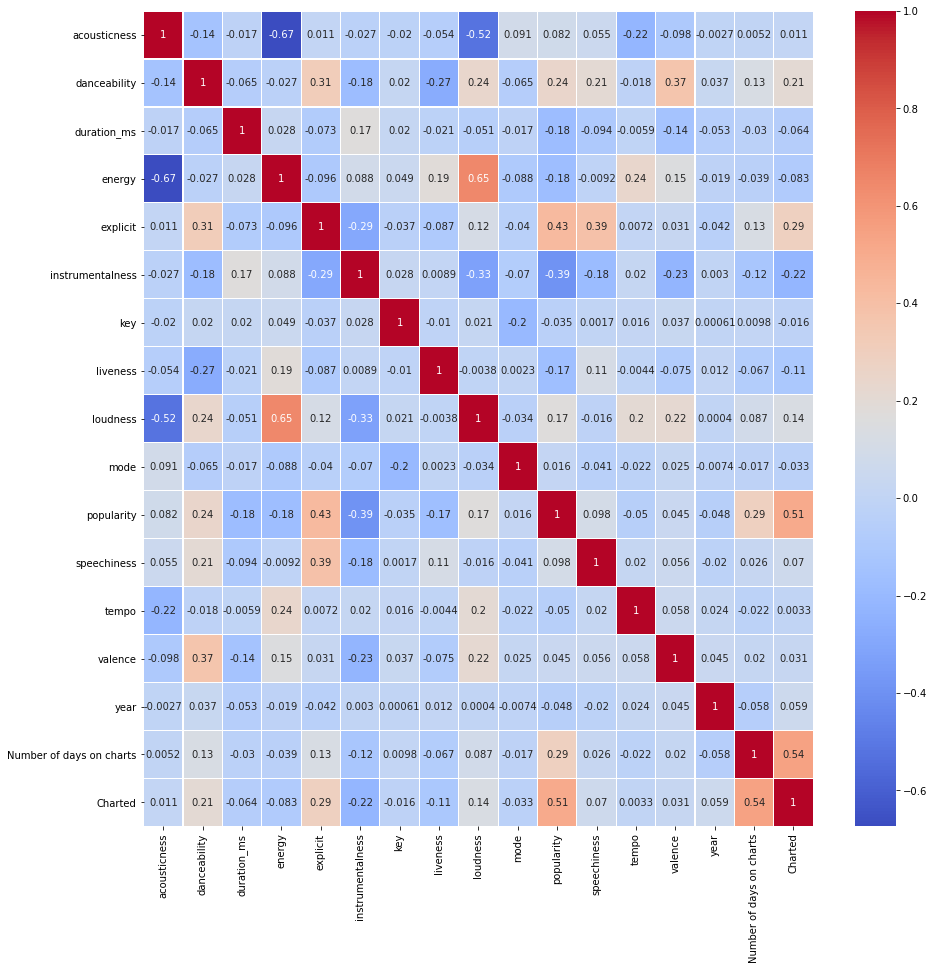

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.1, linecolor='white')

In [ ]:
#Lets use boxplots to see the distribution of data and find any outliers 

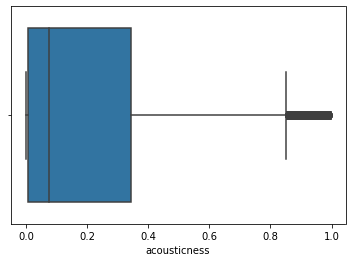

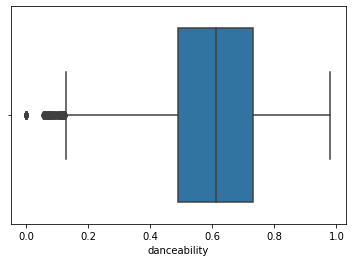

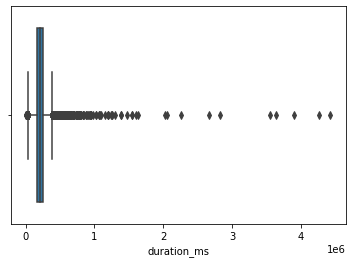

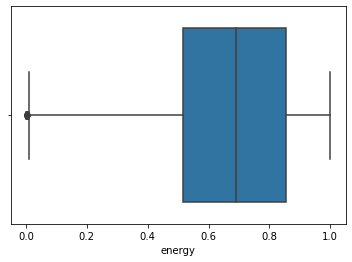

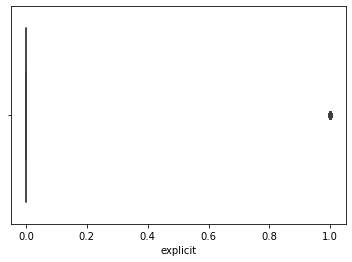

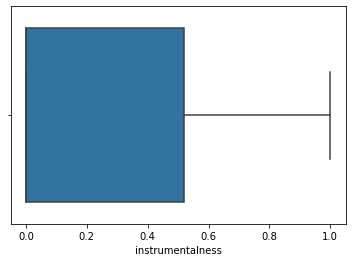

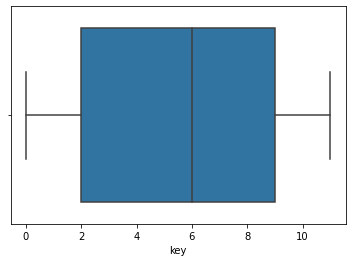

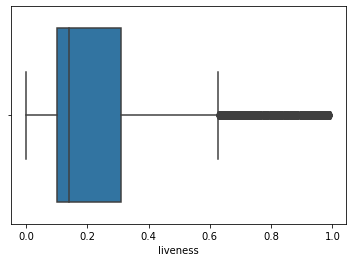

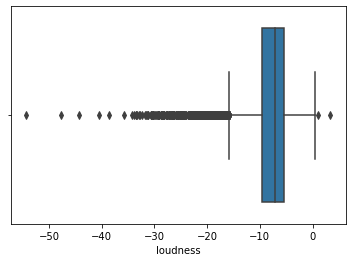

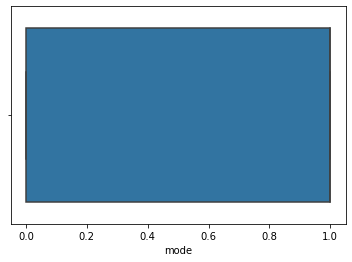

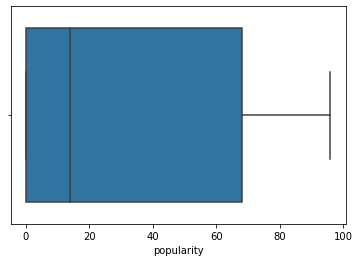

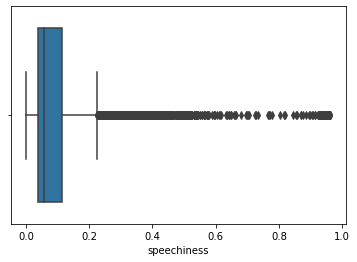

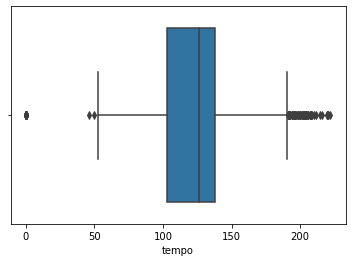

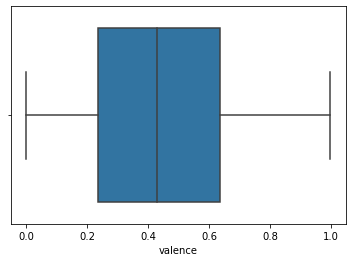

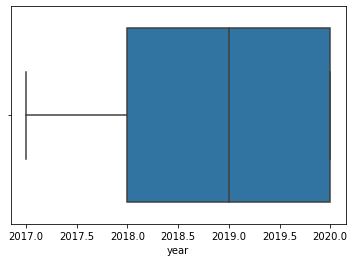

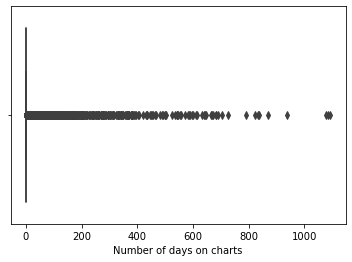

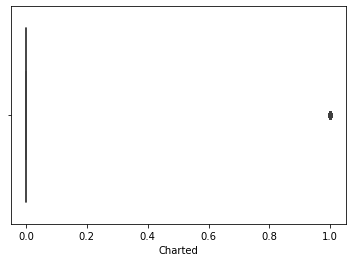

In [14]:
for col in df_non_dummy:
    if df_non_dummy[col].dtype != 'object':
        sns.boxplot(data=df_non_dummy, x=col)
        plt.show()

Duration, loudness, speechhiness, number of days on the charts are all variables with many outliers - We can replace these with the relevant values  

In [15]:
#Duration
q3_duration = df_non_dummy['duration_ms'].quantile(0.75)
q1_duration = df_non_dummy['duration_ms'].quantile(0.25)
IQR = q3_duration - q1_duration
upper_bound = IQR + (3*df_non_dummy['duration_ms'].std())
lower_bound = IQR - (3*df_non_dummy['duration_ms'].std())
print(upper_bound)
print(lower_bound)

528488.656353361
-356608.656353361


In [16]:
df_non_dummy['duration_ms'] = df_non_dummy['duration_ms'].apply(lambda x: upper_bound if x > upper_bound else x)

In [17]:
#Loudness
q3 = df_non_dummy['loudness'].quantile(0.75)
q1 = df_non_dummy['loudness'].quantile(0.25)
IQR = q3 - q1
upper_bound = IQR + (3*df_non_dummy['loudness'].std())
lower_bound = IQR - (3*df_non_dummy['loudness'].std())
print(upper_bound)
print(lower_bound)

16.889125137804083
-8.659125137804086


In [18]:
df_non_dummy['loudness'] = df_non_dummy['loudness'].apply(lambda x: lower_bound if x < lower_bound else x)
df_non_dummy['loudness'] = df_non_dummy['loudness'].apply(lambda x: 0 if x > 0 else x)

In [19]:
#Speechiness
q3 = df_non_dummy['speechiness'].quantile(0.75)
q1 = df_non_dummy['speechiness'].quantile(0.25)
IQR = q3 - q1
upper_bound = IQR + (3*df_non_dummy['speechiness'].std())
lower_bound = IQR - (3*df_non_dummy['speechiness'].std())
print(upper_bound)
print(lower_bound)

0.44212295483624975
-0.29292295483624975


In [20]:
df_non_dummy['speechiness'] = df_non_dummy['speechiness'].apply(lambda x: upper_bound if x > upper_bound else x)

We will drop the number of days on the chart. We are predicting if a song will chart or not therefore, it will not be useful for this analysis

In [21]:
df_non_dummy.drop('Number of days on charts', axis=1, inplace =True)

In [22]:
df = df_non_dummy.copy()

In [23]:
df.drop('name', axis=1, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10585 entries, 0 to 10584
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      10585 non-null  float64
 1   danceability      10585 non-null  float64
 2   duration_ms       10585 non-null  float64
 3   energy            10585 non-null  float64
 4   explicit          10585 non-null  int64  
 5   instrumentalness  10585 non-null  float64
 6   key               10585 non-null  int64  
 7   liveness          10585 non-null  float64
 8   loudness          10585 non-null  float64
 9   mode              10585 non-null  int64  
 10  popularity        10585 non-null  int64  
 11  speechiness       10585 non-null  float64
 12  tempo             10585 non-null  float64
 13  valence           10585 non-null  float64
 14  year              10585 non-null  int64  
 15  Charted           10585 non-null  float64
 16  Main_artist       10585 non-null  object

In [25]:
df.year = df.year.astype('O')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10585 entries, 0 to 10584
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      10585 non-null  float64
 1   danceability      10585 non-null  float64
 2   duration_ms       10585 non-null  float64
 3   energy            10585 non-null  float64
 4   explicit          10585 non-null  int64  
 5   instrumentalness  10585 non-null  float64
 6   key               10585 non-null  int64  
 7   liveness          10585 non-null  float64
 8   loudness          10585 non-null  float64
 9   mode              10585 non-null  int64  
 10  popularity        10585 non-null  int64  
 11  speechiness       10585 non-null  float64
 12  tempo             10585 non-null  float64
 13  valence           10585 non-null  float64
 14  year              10585 non-null  object 
 15  Charted           10585 non-null  float64
 16  Main_artist       10585 non-null  object

In [27]:
df.to_csv('Spotifiy Streamlit Data', index=False)

In [28]:
df.Charted.value_counts(normalize=True)

0.0    0.891356
1.0    0.108644
Name: Charted, dtype: float64

We can see that our data is highly imbalanced therefore, we can use different methods to deal with this 

#### Why shouldn't we use accuracy as our performance metric?
You shouldn’t use accuracy on imbalanced problems as it is easy to get a high accuracy score by simply classifying all observations as the majority class.

We will use F1 score -  it combines precision and recall into one metric by calculating the harmonic mean between those two
We are using it as we equally care about both precision and recall 

In [210]:
#df.drop(['Main_artist', 'Featured_artist'], axis=1, inplace=True)

In [30]:
df = pd.get_dummies(df)

In [31]:
#df.drop('year_2017', axis=1, inplace=True)

In [32]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence', 'Charted', 'year_2017', 'year_2018',
       'year_2019', 'year_2020', 'Main_artist_21 Savage',
       'Main_artist_Ariana Grande', 'Main_artist_BTS', 'Main_artist_Bad Bunny',
       'Main_artist_Billie Eilish', 'Main_artist_Cardi B',
       'Main_artist_DaBaby', 'Main_artist_Drake', 'Main_artist_Dua Lipa',
       'Main_artist_Ed Sheeran', 'Main_artist_Eminem', 'Main_artist_Future',
       'Main_artist_J. Cole', 'Main_artist_Juice WRLD', 'Main_artist_Khalid',
       'Main_artist_Kid Cudi', 'Main_artist_Lil Baby',
       'Main_artist_Lil Uzi Vert', 'Main_artist_Mac Miller',
       'Main_artist_Miley Cyrus', 'Main_artist_Other', 'Main_artist_Ozuna',
       'Main_artist_Playboi Carti', 'Main_artist_Pop Smoke',
       'Main_artist_Post Malone', 'Main_artist_Taylor Swift',
       'Main_artist_The 

# Model building 

In [33]:
X = df.drop('Charted', axis=1)

In [34]:
y = df['Charted'].values

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, cross_val_predict
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import average_precision_score, auc, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Initial model building without any tuning 

In [38]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
classifiers = [lr, dt, rf]

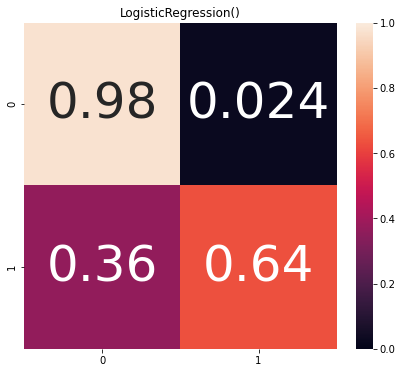

The precision score is 0.77
The recall score is 0.64
The F1 score is 0.7
ROC score is 0.97


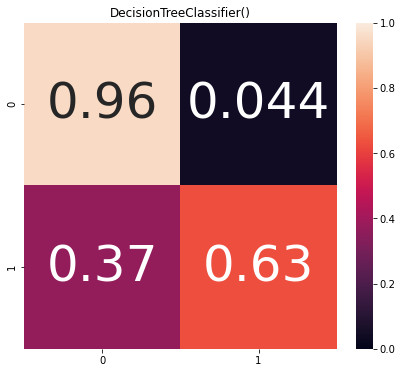

The precision score is 0.64
The recall score is 0.65
The F1 score is 0.63
ROC score is 0.8


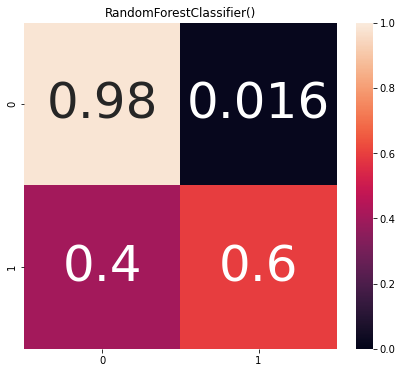

The precision score is 0.81
The recall score is 0.61
The F1 score is 0.7
ROC score is 0.97


In [39]:
classifiers = [lr, dt, rf]
for c in classifiers:
    y_pred = cross_val_predict(c, X_train_scaled, y_train, cv=5)
    cm = confusion_matrix(y_train, y_pred)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(7,6))
    sns.heatmap(cm_norm, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    plt.title(c)
    plt.show()
    precision = cross_val_score(c, X_train_scaled, y_train, cv=5, scoring='precision').mean().round(2)
    recall = cross_val_score(c, X_train_scaled, y_train, cv=5, scoring='recall').mean().round(2)
    f1 = cross_val_score(c, X_train_scaled, y_train, cv=5, scoring='f1').mean().round(2)
    roc = cross_val_score(c, X_train_scaled, y_train, cv=5, scoring='roc_auc').mean().round(2)
    print('The precision score is {}'.format(precision))
    print('The recall score is {}'.format(recall))
    print('The F1 score is {}'.format(f1))
    print('ROC score is {}'.format(roc))

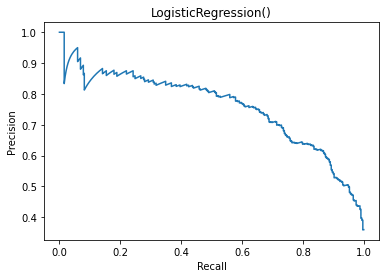

The area under the curve is 0.76


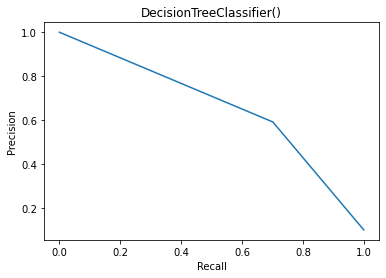

The area under the curve is 0.66


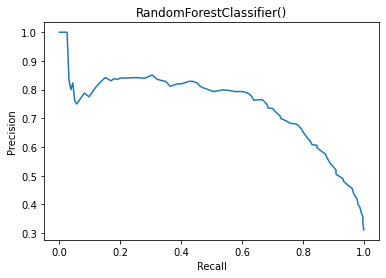

The area under the curve is 0.75


In [40]:
classifiers = [lr, dt, rf]
for c in classifiers:    
    c.fit(X_train_scaled, y_train)
    y_pred_proba = c.predict_proba(X_test_scaled)
    y_pred_proba = y_pred_proba[:,1]
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recalls,precisions, label=c)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(c)
    plt.show()
    print('The area under the curve is {:.2f}'.format(auc(recalls, precisions)))

Lets see what oversampling does to our accuracy metric 
 - In this case we will focus on F1

In [41]:
smote = SMOTE(random_state = 101)

In [43]:
X_oversample, y_oversample = smote.fit_resample(X, y)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_oversample, y_oversample, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train1_scaled = scaler.fit_transform(X_train1)
X_test1_scaled = scaler.transform(X_test1)

In [44]:
for c in classifiers:
    c.fit(X_train1_scaled, y_train1)
    y_pred = c.predict(X_test1_scaled)
    print('Metrics for SMOTE', c)
    print('')
    print('Classification report:')
    print(classification_report(y_test1, y_pred))
    print('')
    print('F1 score:')
    print(f1_score(y_test1,y_pred))
    print('')

Metrics for SMOTE LogisticRegression()

Classification report:
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      2842
         1.0       0.97      0.95      0.96      2819

    accuracy                           0.96      5661
   macro avg       0.96      0.96      0.96      5661
weighted avg       0.96      0.96      0.96      5661


F1 score:
0.9615178091999284

Metrics for SMOTE DecisionTreeClassifier()

Classification report:
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      2842
         1.0       0.95      0.95      0.95      2819

    accuracy                           0.95      5661
   macro avg       0.95      0.95      0.95      5661
weighted avg       0.95      0.95      0.95      5661


F1 score:
0.9529724933451642

Metrics for SMOTE RandomForestClassifier()

Classification report:
              precision    recall  f1-score   support

         0.0       0.97      0.9

It looks like Random Forest gives us the highest F1 score therefore, I will focus on that when tuning my parameters 

# Hyperparameter tuning

### Random Forest

### Random Forest

In [46]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,500], 
                               'max_depth': [3,5,10,50,100],
                                 'min_samples_leaf': [1,4,10]}
                                  
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 20, cv = 5)
clf_rf_rnd.fit(X_train1_scaled, y_train1)
y_pred = clf_rf_rnd.predict(X_test1_scaled)

In [47]:
f1 = f1_score(y_test1, y_pred).round(4)

print('The F1 score is {}'.format(f1))

The F1 score is 0.9658


In [58]:
clf_rf_rnd.best_params_

{'n_estimators': 100, 'min_samples_leaf': 1, 'max_depth': 100}

In [59]:
best_model = RandomForestClassifier(random_state=1, max_depth= 100,
                                        min_samples_leaf= 1,
                                        n_estimators= 100)

In [60]:
best_model.fit(X_train1_scaled, y_train1)

RandomForestClassifier(max_depth=100, random_state=1)

In [74]:
feats = pd.DataFrame(best_model.feature_importances_, index=X.columns, columns=['Importance'])
feats_10 = feats.sort_values(by='Importance', ascending = False).head(10)

<AxesSubplot:xlabel='Importance'>

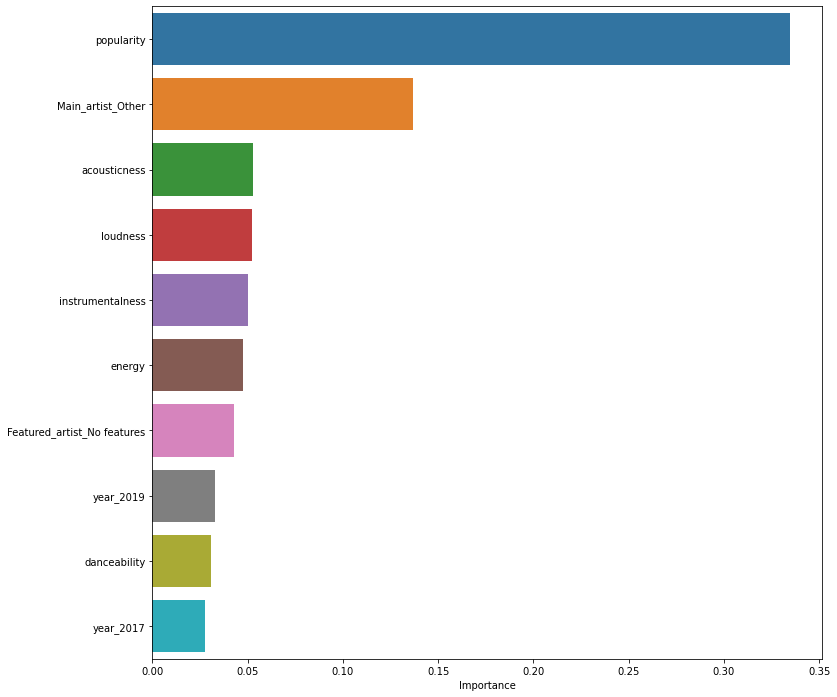

In [75]:
plt.figure(figsize=(12,12))
sns.barplot(data=feats_10, y=feats_10.index, x='Importance')

In [63]:
import pickle 
filename = 'spotify_model.pkl'
pickle.dump(best_model, open(filename, 'wb'))

### Predictions

In [64]:
predictions = best_model.predict(scaler.transform(X))

In [65]:
pd.Series(predictions).value_counts(normalize=True)

0.0    0.889372
1.0    0.110628
dtype: float64

In [66]:
predictions = pd.DataFrame(pd.Series(predictions))

In [67]:
predictions = predictions.rename(columns={0: "Prediction"})

In [69]:
new_df = pd.concat([df_non_dummy, predictions], axis=1)

In [70]:
new_df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,Charted,Main_artist,Featured_artist,Prediction
0,0.887,0.319,187333.0,0.201,0,0.000000,7,0.9040,-8.659125,1,The September Of My Years - Live At The Sands ...,27,0.0623,117.153,0.239,2018,0.0,Other,No features,0.0
1,0.938,0.269,236800.0,0.129,0,0.000005,7,0.6830,-8.659125,0,It Was A Very Good Year - Live At The Sands Ho...,26,0.0576,82.332,0.160,2018,0.0,Other,No features,0.0
2,0.881,0.644,313093.0,0.212,0,0.000022,11,0.7980,-8.659125,1,"The Circle Game - Live at The 2nd Fret, Philad...",19,0.0347,117.072,0.441,2020,0.0,Other,No features,0.0
3,0.955,0.627,295093.0,0.184,0,0.000162,1,0.0986,-8.659125,1,"Urge For Going - Live at The 2nd Fret, Philade...",19,0.0450,115.864,0.299,2020,0.0,Other,No features,0.0
4,0.888,0.581,183440.0,0.331,0,0.000015,6,0.1470,-8.659125,1,What's The Story Mr. Blue - Live at The 2nd Fr...,19,0.2430,88.303,0.642,2020,0.0,Other,No features,0.0


In [71]:
potential_hits = new_df[(new_df['Charted']==0) & (new_df['Prediction'] ==1)]

In [72]:
potential_hits_final = potential_hits[['name', 'year', 'Main_artist', 'Featured_artist']]

In [73]:
potential_hits_final.head(50)

,name,year,Main_artist,Featured_artist
333,wokeuplikethis*,2017,Playboi Carti,Lil Uzi Vert
353,Freestyle,2017,Lil Baby,No features
377,Chasin' You,2018,Other,No features
387,Lean Wit Me,2018,Juice WRLD,No features
454,Hide (feat. Seezyn),2018,Juice WRLD,Other
676,Sanguine Paradise,2019,Lil Uzi Vert,No features
742,willow,2020,Taylor Swift,No features
817,‘tis the damn season,2020,Taylor Swift,No features
831,I Hope,2020,Other,No features
1076,Heart Mind,2017,Other,Other
